# 서포트 벡터 머신(support vector machine)

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
c=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv')
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [4]:
# 설명변수와 타깃변수를 설정한 뒤, 7:3 dml ql
from sklearn.model_selection import train_test_split

x=c[['age', 'interest']]
y=c['success']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(207, 2) (90, 2) (207,) (90,)


SVM은 특성의 스케일에 민갛ㅁ하기 때문에 scikit-learn의 StandardScaler을 사용하면 좀더 예측력 높은 결정경계를 생성할 수 있다.

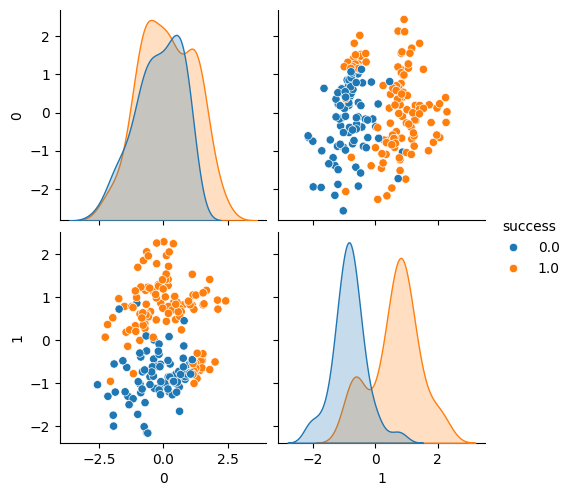

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x) # train_x 데이터를 표준화하여 변환(fit_trainsform: 학습 데이터에 대해 평균과 표준편차를 계산하여 변환)

sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1), hue='success')
# 각 변수 간의 관계를 시각화한 페어플롯을 그리고, hue 매개변수를 'success'로 설정하여 성공 여부에 따라 색상을 다르게 표시

SVC 모델을 만들고 데이터 적합

In [6]:
from sklearn.svm import SVC

clf = SVC(C=0.5, random_state=45)
clf.fit(train_x, train_y)

SVC(C=0.5, random_state=45)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터를 표준화(train 데이터에 맞춰 학습한 scaler를 사용)
test_x_scal = scaler.transform(test_x)

# 표준화된 테스트 데이터로 예측 수행
pred=clf.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred) # 혼동 행렬 계산 (실제값 test_y와 예측값 pred 비교)
test_acc=accuracy_score(test_y, pred) # 정확도 계산 (accuracy)
test_prc=precision_score(test_y, pred) # 정밀도 계산 (precision)
test_rcll=recall_score(test_y, pred) # 재현율 계산(recall)
test_f1=f1_score(test_y, pred) # F1 점수 계산 (precision과 recall의 조화 평균)

# 혼동 행렬 출력
print(test_cm)
print('\n')

# 정확도, 정밀도, 재현율, F1 점수 출력, 소수점 둘째 자리까지 반올림하여 퍼센트로 표시
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


classification 데이터에서 하이퍼파라미터 C의 값이 커지면 마진과 옳지 않은 데이터의 허용치가 증가한다.

C:\Users\dudgh\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


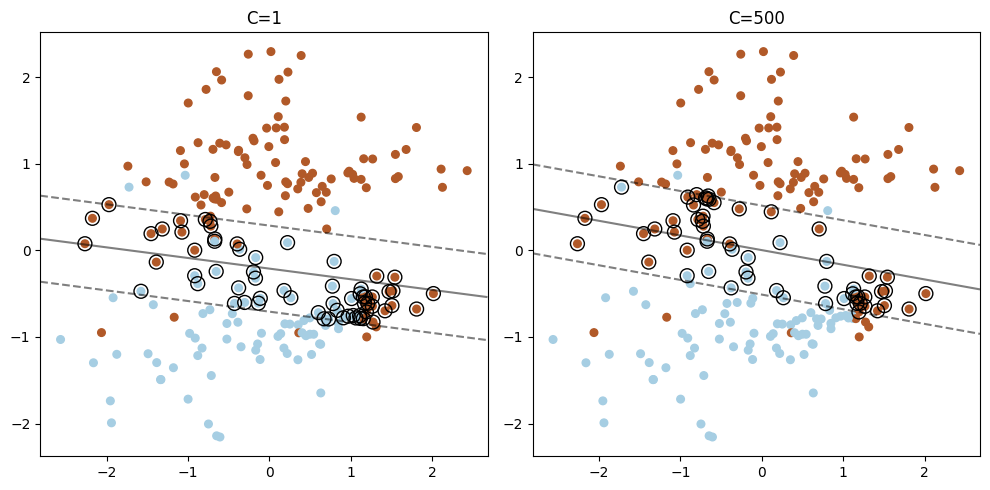

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# 그래프의 크기 설정
plt.figure(figsize=(10, 5))

# c 값이 1과 500인 두 모델을 비교하기 위한 반복문
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y) #LinearSVC 모델 생성하고 학습(hinge 손실을 사용)
    decision_function = clf.decision_function(train_x) # decision_function을 사용하여 각 샘플의 결정 함수 값 계산 (서프트 벡터를 얻기 위함)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0] # 서포트 벡터의 인덱스 찾기(결정 함수 값이 -1과 1 사이인 포인트)
    support_vectors = train_x[support_vector_indices] # 서포트 벡터 추출

    # 서브플롯 생성 (1x2 배열에서 i번째 그래프)
    plt.subplot(1, 2, i +1)
    #데이터 포인트를 산점도로 시각화
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    
    # 현재 서브플롯의 x, y 범위를 가져옴
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그리드 생성 (결정 경계를 그리기 위한 x, y 좌표의 그리드)
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )

    # 결정 함수 값을 그리드에 맞게 계산
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 결정 경계와 서포트 벡터를 컨투어로 시각화
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1], #-1, 0, 1레벨로 경계선 표시
        alpha=0.5,
        linestyles=["--", "-", "--"], # 경계선의 스타일 지정(0은 실선, 나머지는 점선)
    )

    # 서포트 벡터를 원으로 강조 표시
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    
    # 서브플롯의 제목을 C 값으로 설정
    plt.title("C="+str(C))
# 레이아웃을 조정하여 그래프 간 간격을 맞춤
plt.tight_layout()
# 그래프를 화면에 출력
plt.show()

### 2. 회귀
#### scikit-learn의 LinearSVR

In [9]:
import numpy as np

# 샘플데이터 생성하기
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.09800106]
 [0.16415657]
 [0.28921193]
 [0.72673905]
 [0.82547975]
 [0.99972457]] 

 [0.09784427 0.16342029 0.28519697 0.66443611 0.73487324 0.84132214
 0.91951412 0.93967857 0.95487923 0.99623547]


In [10]:
# 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[-0.15275131  0.16342029  0.28519697  0.66443611  0.73487324  0.44254435
  0.91951412  0.93967857  0.95487923  0.99623547]


In [11]:
from sklearn.svm import SVR

# 회귀 모델 적합시키기
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1) # RBF 커널을 사용한 서포트 벡터 회귀 모델 설정
svr_lin = SVR(kernel='linear', C=100, gamma='auto') # 선형 커널을 사용한 서포트 벡터 회귀 모델 설정
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1) # 다항 커널을 사용한 서포트 벡터 회귀 모델 설정

svr_rbf.fit(X, y) # RBF 커널 모델 학습
svr_lin.fit(X, y) # 선형 커넬 모델 학습
svr_poly.fit(X, y) # 다항 커넬 모델 학습

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [12]:
# 각각의 SVR 모델에 predict()메서드 활용해 각 커널에 대해 예측 수행
rbf_pred=svr_rbf.predict(X)
lin_pred=svr_lin.predict(X)
poly_pred=svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

#예측값과 커널 이름 리스트
preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

# 결과를 저장할 데이터프레임 생성(커널 이름을 인덱스로, 평가 지표를 컬럼으로)
results=pd.DataFrame(index =kernel,columns =evls)

# 각 커널별로 MSE, MAE, RMSE 계산
for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    # 결과 데이터프레임에 값 입력 (소수점 둘째 자리까지 반올림)
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

# 결과 출력
results

C:\Users\dudgh\AppData\Local\Temp\ipykernel_5184\2055163230.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc[nm]['mse']=round(mse,2)
C:\Users\dudgh\AppData\Local\Temp\ipykernel_5184\2055163230.py:26: FutureWarning: ChainedAss

,mse,rmse,mae
Random_Forest,0.1,0.32,0.18
Linear,0.27,0.52,0.38
Polynomial,0.11,0.33,0.17


세가지 종류의 SVR 모형을 시각화

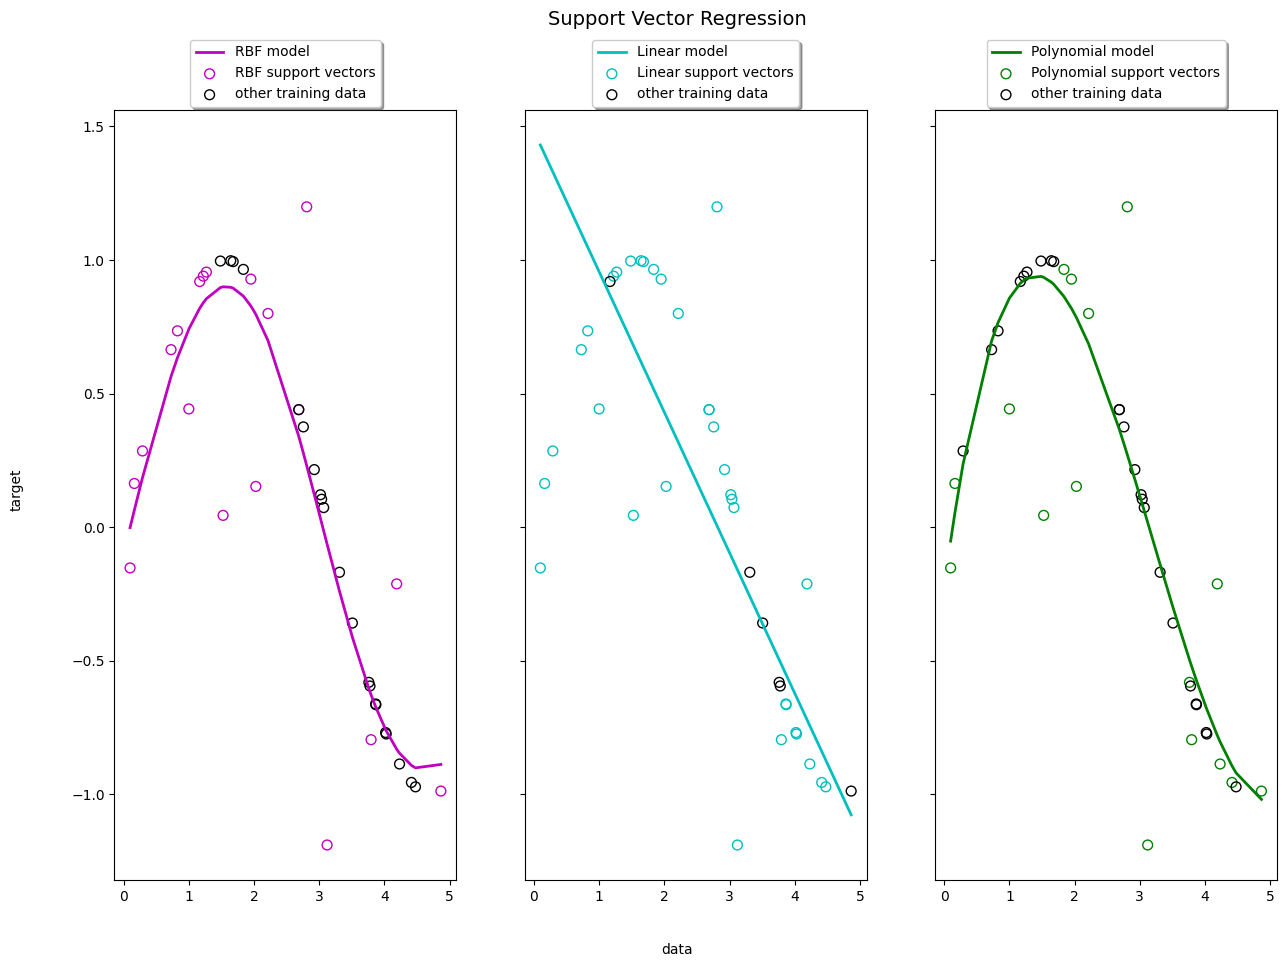

In [13]:
import matplotlib.pyplot as plt
lw = 2  # 선의 두께 설정

# 세 가지 SVR 모델과 해당 커널 이름 및 색상을 리스트로 설정
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]  # 모델별 색상 (자주색, 청록색, 녹색)

# 1행 3열의 서브플롯을 생성하고, y축 공유 설정 (가로 15인치, 세로 10인치)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

# 각 SVR 모델에 대해 예측 결과와 서포트 벡터를 시각화
for ix, svr in enumerate(svrs):
    # SVR 모델로 예측한 값과 데이터 포인트를 연결하는 선 그리기
    axes[ix].plot(
        X,  # 입력 데이터
        svr.fit(X, y).predict(X),  # 예측 결과
        color=model_color[ix],  # 해당 모델의 색상
        lw=lw,  # 선의 두께
        label="{} model".format(kernel_label[ix]),  # 범례에 모델 이름 추가
    )
    
    # 서포트 벡터들을 원으로 강조하여 시각화
    axes[ix].scatter(
        X[svr.support_],  # 서포트 벡터의 X 값
        y[svr.support_],  # 서포트 벡터의 y 값
        facecolor="none",  # 내부 채우지 않음
        edgecolor=model_color[ix],  # 외곽선은 해당 모델의 색상
        s=50,  # 점 크기
        label="{} support vectors".format(kernel_label[ix]),  # 범례에 서포트 벡터 추가
    )
    
    # 서포트 벡터가 아닌 나머지 데이터 포인트를 다른 색상으로 표시
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],  # 서포트 벡터가 아닌 X 값
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],  # 서포트 벡터가 아닌 y 값
        facecolor="none",  # 내부 채우지 않음
        edgecolor="k",  # 외곽선은 검은색
        s=50,  # 점 크기
        label="other training data",  # 범례에 기타 학습 데이터 추가
    )
    
    # 범례 설정
    axes[ix].legend(
        loc="upper center",  # 범례 위치
        bbox_to_anchor=(0.5, 1.1),  # 범례의 위치를 그래프 상단으로 조정
        ncol=1,  # 범례의 열 수
        fancybox=True,  # 테두리 모서리 둥글게
        shadow=True,  # 그림자 효과 추가
    )

# x축과 y축 레이블 추가
fig.text(0.5, 0.04, "data", ha="center", va="center")  # x축 레이블
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")  # y축 레이블

# 전체 제목 추가
fig.suptitle("Support Vector Regression", fontsize=14)

# 그래프 보여주기
plt.show()
